# 1 Installing the YOLOv8 Environment

To start off with YOLOv8 we first clone the YOLOv8 repository and install dependencies. This will set up our programming environment to be ready to running object detection training and inference commands.

In [1]:
# Clone repository
!git clone https://github.com/ultralytics/ultralytics

# Navigate to the cloned directory
%cd ultralytics

# Install the package in editable mode for development
!pip install -e .

C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\ultralytics


Cloning into 'ultralytics'...
Updating files:   7% (42/566)
Updating files:   8% (46/566)
Updating files:   9% (51/566)
Updating files:  10% (57/566)
Updating files:  11% (63/566)
Updating files:  12% (68/566)
Updating files:  13% (74/566)
Updating files:  14% (80/566)
Updating files:  15% (85/566)
Updating files:  16% (91/566)
Updating files:  17% (97/566)
Updating files:  18% (102/566)
Updating files:  19% (108/566)
Updating files:  19% (113/566)
Updating files:  20% (114/566)
Updating files:  21% (119/566)
Updating files:  22% (125/566)
Updating files:  23% (131/566)
Updating files:  24% (136/566)
Updating files:  25% (142/566)
Updating files:  26% (148/566)
Updating files:  27% (153/566)
Updating files:  28% (159/566)
Updating files:  29% (165/566)
Updating files:  30% (170/566)
Updating files:  31% (176/566)
Updating files:  31% (179/566)
Updating files:  32% (182/566)
Updating files:  33% (187/566)
Updating files:  34% (193/566)
Updating files:  35% (199/566)
Updating files:  36%

Obtaining file:///C:/Users/CP1/Documents/GitHub/Consignment-Itemized-Data/ultralytics
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ultralytics (pyproject.toml): started
  Building editable for ultralytics (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.1.28-0.editable-py3-none-any.whl size=22947 sha256=b478ff599223248ca10562105f2a7ab1ba9190bc32ac03053703163ed5c4007e
  Stored in directory: C:\Users\CP1\AppData\Local\Temp\pip-ephem-wheel-cache-i1o2eopo\wheels\03\01\2c\

# 2 Import Libraries

In [2]:
import torch
print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))
from ultralytics import YOLO

import yaml
import glob
from IPython.display import Image, display
from IPython.core.magic import register_line_cell_magic

from DataAugmentation import DataAugmentation

torch 1.13.1+cu116 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3090', major=8, minor=6, total_memory=24575MB, multi_processor_count=82)


In [3]:
%cd ..

# Open and read the YAML file
with open('configuration/config-CID.yaml', 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data

C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data


C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


{'path': 'C:/Users/CP1/Documents/GitHub/Consignment-Itemized-Data/CID-yolov8',
 'train': 'train.txt',
 'val': 'valid.txt',
 'nc': 1,
 'names': ['Table']}

In [4]:
# Define number of classes based on YAML
with open('configuration/config-CID.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(f'Number of class: {num_classes}')

Number of class: 1


In [5]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)

Current Directory: C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data


# 3 Train YOLOv8

In [12]:
model = YOLO('yolov8s.pt')  # build a new model from scratch

results = model.train(data='configuration/config-CID.yaml', epochs=100, workers=1, imgsz=416)  # train the model

Ultralytics YOLOv8.1.28 🚀 Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=configuration/config-CID.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

train: Scanning CID-yolov8\obj_train_data... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<00:00, 690.28it/s]

train: New cache created: CID-yolov8\obj_train_data.cache



val: Scanning CID-yolov8\obj_train_data... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 645.16it/s]

val: New cache created: CID-yolov8\obj_train_data.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 1 dataloader workers
Logging results to runs\detect\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.82G      1.603      2.904      1.597          6        416: 100%|██████████| 9/9 [00:23<00:00,  2.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.17it/s]

                   all         20         20     0.0925       0.15     0.0567     0.0159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.95G      1.069       1.82      1.298          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.68it/s]

                   all         20         20      0.409       0.45      0.228      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.95G     0.8212      1.544      1.121          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.34it/s]

                   all         20         20        0.2        0.3      0.085      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.95G     0.8124      1.169      1.097          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.65it/s]

                   all         20         20    0.00503       0.55    0.00518    0.00221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.95G     0.8133      1.157      1.059          8        416: 100%|██████████| 9/9 [00:01<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all         20         20      0.429        0.3      0.184     0.0926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.95G     0.7753      1.052      1.087          3        416: 100%|██████████| 9/9 [00:01<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.64it/s]

                   all         20         20     0.0626       0.25     0.0427     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.95G     0.8264      1.095      1.117          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         20         20      0.134        0.5     0.0952     0.0279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.95G     0.8119      1.256      1.125          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         20         20      0.218      0.404      0.148     0.0608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.95G     0.7807     0.9837      1.033          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.65it/s]

                   all         20         20     0.0205       0.55     0.0204     0.0074



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.95G     0.7871     0.9377      1.038          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all         20         20     0.0139        0.1     0.0112    0.00282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.95G     0.7492      1.002      1.057          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all         20         20     0.0576       0.05     0.0116    0.00389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.95G     0.7854      0.967      1.083          5        416: 100%|██████████| 9/9 [00:01<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.88it/s]

                   all         20         20      0.245        0.6      0.278     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.95G     0.7813      0.904      1.054          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.44it/s]

                   all         20         20      0.228       0.55       0.19     0.0702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.95G     0.7997     0.8597      1.062          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.55it/s]

                   all         20         20   0.000804       0.05   0.000349   5.54e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.95G      0.804     0.9413      1.056          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.41it/s]

                   all         20         20     0.0059       0.05    0.00101   0.000101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.95G     0.7027     0.7924      1.051          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]

                   all         20         20     0.0134       0.05    0.00592   0.000831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.95G     0.7042     0.7575      1.012          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         20         20      0.214       0.25      0.105     0.0313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.95G     0.6675     0.6872      1.013          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all         20         20      0.356       0.45      0.262      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.95G     0.6852     0.7287      1.026          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.62it/s]

                   all         20         20      0.445        0.4       0.29      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.95G     0.6725     0.7183      1.011          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.27it/s]

                   all         20         20       0.45        0.5      0.295      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.95G     0.6776     0.8069      1.019          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.18it/s]

                   all         20         20      0.448       0.55      0.329       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.95G     0.6199     0.7565      1.003          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.80it/s]

                   all         20         20      0.386       0.75      0.393      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.95G     0.6559     0.7975      1.012          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all         20         20       0.38        0.8      0.399      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.95G      0.637     0.7957      0.979          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.57it/s]

                   all         20         20      0.597       0.55      0.453       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.95G     0.5962     0.6971      1.016          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.91it/s]

                   all         20         20      0.496       0.45      0.364      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.95G      0.596     0.7318      1.001          6        416: 100%|██████████| 9/9 [00:01<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         20         20      0.336       0.65       0.41      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.95G     0.6115     0.6703     0.9934          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.10it/s]

                   all         20         20      0.387        0.7      0.494      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.95G     0.6266     0.6614     0.9922          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.00it/s]

                   all         20         20      0.466        0.4      0.402      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.95G     0.5904     0.6215     0.9696          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all         20         20       0.48       0.35      0.401       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.95G     0.5661     0.6275     0.9458          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.43it/s]

                   all         20         20      0.496      0.395       0.38      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.95G     0.5886     0.6352     0.9741          7        416: 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.44it/s]

                   all         20         20      0.459        0.4      0.397      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.95G     0.5579      0.653     0.9581          8        416: 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.80it/s]

                   all         20         20      0.408      0.449      0.377      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.95G     0.5567     0.5871     0.9539          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all         20         20      0.333       0.55      0.441      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.95G     0.6112     0.6844     0.9998          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.96it/s]

                   all         20         20      0.349       0.65      0.428        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.95G      0.529     0.5815     0.9623          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.95it/s]

                   all         20         20      0.424       0.45      0.386      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.95G     0.5643     0.6425     0.9727          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.66it/s]

                   all         20         20      0.389        0.5      0.454      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.95G      0.565     0.6779     0.9613          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.11it/s]

                   all         20         20      0.412        0.6      0.462      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.95G     0.5805     0.8118      1.006          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all         20         20      0.408       0.65      0.476      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.95G     0.5203      0.604     0.9693          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.34it/s]

                   all         20         20      0.355       0.65      0.373      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.95G     0.4928     0.5335     0.9356          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.72it/s]

                   all         20         20      0.334      0.553      0.433      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.95G      0.475     0.5476     0.9426          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         20         20      0.377        0.6      0.483      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.95G     0.5386     0.6912     0.9628          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.18it/s]

                   all         20         20      0.402       0.65      0.449       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.95G     0.4887     0.5883     0.9706          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all         20         20      0.388        0.6      0.464      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.95G     0.4866     0.5536     0.9459          3        416: 100%|██████████| 9/9 [00:01<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.87it/s]

                   all         20         20      0.449        0.5      0.483      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.95G     0.4691     0.5574     0.9335          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.84it/s]

                   all         20         20      0.476        0.5      0.512       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.95G     0.5107     0.5836     0.9596          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         20         20      0.428        0.6      0.452      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.95G     0.4672     0.5723     0.9429          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.92it/s]

                   all         20         20       0.39      0.544      0.432      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.95G     0.5485     0.6717      0.977          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         20         20      0.401      0.702      0.467      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.95G     0.4892     0.6244     0.9447          8        416: 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.37it/s]

                   all         20         20      0.398        0.8      0.447      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.95G     0.4425     0.4965     0.9341          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.87it/s]

                   all         20         20      0.412        0.8      0.478      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.95G     0.4706     0.5409      0.949          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.26it/s]

                   all         20         20      0.335      0.503       0.44      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.95G     0.5565     0.5823      1.023          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all         20         20      0.341        0.5      0.409      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.95G     0.4455     0.5484     0.9305          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.35it/s]

                   all         20         20      0.424        0.5      0.421      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.95G     0.4731     0.5594     0.9247          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.95it/s]

                   all         20         20       0.38      0.552      0.402      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.95G      0.481     0.5756     0.9645          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all         20         20      0.401        0.5      0.428      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.95G     0.4081     0.5656     0.9352          4        416: 100%|██████████| 9/9 [00:01<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]

                   all         20         20      0.447        0.5      0.465      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.95G     0.4954     0.5788     0.9322          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         20         20      0.437        0.5      0.459      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.95G     0.4792     0.6076     0.9776          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.25it/s]

                   all         20         20      0.429        0.5      0.455      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.95G      0.437     0.4964     0.9197          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         20         20      0.395       0.55      0.457      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.95G     0.4566     0.4751     0.9521          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.03it/s]

                   all         20         20      0.392        0.6      0.449      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.95G     0.4396     0.5853     0.9301          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.29it/s]

                   all         20         20      0.405      0.647      0.486       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.95G     0.4291     0.4692     0.9151          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.63it/s]

                   all         20         20      0.409      0.657       0.47      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.95G     0.4903     0.4963     0.9915          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]

                   all         20         20      0.403      0.541      0.441      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.95G     0.4122     0.4989     0.9392          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.71it/s]

                   all         20         20      0.409      0.727        0.5      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.95G     0.4625     0.5156     0.9218          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.02it/s]

                   all         20         20      0.395      0.717      0.496       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.95G     0.4757     0.5261      1.002          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.42it/s]

                   all         20         20      0.378        0.7      0.484      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.95G     0.4014     0.4542     0.9379          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]

                   all         20         20      0.395        0.7      0.464      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.95G     0.4997     0.7038     0.9727          2        416: 100%|██████████| 9/9 [00:01<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all         20         20      0.368       0.55      0.424      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.95G     0.4272     0.5356     0.9287          8        416: 100%|██████████| 9/9 [00:01<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.68it/s]

                   all         20         20       0.38       0.55      0.412      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.95G      0.386     0.5562     0.9151          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         20      0.404        0.6      0.435      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.95G     0.4564     0.5374     0.9632          7        416: 100%|██████████| 9/9 [00:01<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.28it/s]

                   all         20         20      0.425        0.6       0.51      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.95G     0.4679     0.4858     0.9629          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.59it/s]

                   all         20         20      0.423        0.6      0.484      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.95G     0.3836     0.5045     0.9129          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.09it/s]

                   all         20         20      0.441        0.6      0.455      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.95G     0.4301     0.5771     0.9419          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all         20         20      0.425       0.55      0.458      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.95G     0.3825     0.4596     0.8833          8        416: 100%|██████████| 9/9 [00:01<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         20         20      0.361      0.706      0.449       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.95G     0.4604     0.5217     0.9574          8        416: 100%|██████████| 9/9 [00:01<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

                   all         20         20      0.384       0.65      0.473      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.95G      0.408     0.5285     0.9037          3        416: 100%|██████████| 9/9 [00:01<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.20it/s]

                   all         20         20        0.4       0.65      0.468      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.95G     0.4384     0.5228     0.9358          4        416: 100%|██████████| 9/9 [00:01<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.93it/s]

                   all         20         20      0.401       0.65      0.484      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.95G     0.3754     0.4801     0.9127          4        416: 100%|██████████| 9/9 [00:01<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.94it/s]

                   all         20         20      0.428       0.55      0.483      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.95G     0.4272     0.5601     0.9247          8        416: 100%|██████████| 9/9 [00:01<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.00it/s]

                   all         20         20      0.404        0.6      0.488      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.95G      0.373     0.4624     0.9229          6        416: 100%|██████████| 9/9 [00:01<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.49it/s]

                   all         20         20      0.394      0.619      0.498      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.95G     0.4078     0.4263     0.9299          7        416: 100%|██████████| 9/9 [00:01<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         20         20      0.389        0.7      0.499      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.95G     0.3841     0.4517     0.9409          3        416: 100%|██████████| 9/9 [00:01<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.54it/s]

                   all         20         20      0.406        0.8       0.48      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.95G     0.3903      0.509     0.9101          7        416: 100%|██████████| 9/9 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all         20         20      0.422       0.85      0.502      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.95G     0.4384     0.5134     0.9297          6        416: 100%|██████████| 9/9 [00:01<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         20         20      0.429      0.828      0.521      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.95G     0.3958     0.5438      0.923          5        416: 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.47it/s]

                   all         20         20      0.412        0.7      0.516      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.95G     0.3286      0.459     0.8995          5        416: 100%|██████████| 9/9 [00:01<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.91it/s]

                   all         20         20      0.392       0.65      0.493      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.95G     0.4077     0.5109     0.9248          3        416: 100%|██████████| 9/9 [00:01<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.57it/s]

                   all         20         20      0.371        0.6      0.447      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.95G     0.3742     0.5023     0.9102          5        416: 100%|██████████| 9/9 [00:01<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.36it/s]

                   all         20         20      0.364       0.65      0.438      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.95G     0.3871     0.4931     0.9346          6        416: 100%|██████████| 9/9 [00:01<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.62it/s]

                   all         20         20      0.395        0.7       0.47       0.26


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.95G     0.3766     0.5002     0.9193          2        416: 100%|██████████| 9/9 [00:22<00:00,  2.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.77it/s]

                   all         20         20      0.414       0.65      0.486      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.95G     0.3164     0.4566     0.8739          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.63it/s]

                   all         20         20      0.407       0.55      0.475      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.95G     0.3236     0.4032     0.8519          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.03it/s]

                   all         20         20      0.407      0.548      0.493      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.95G     0.2984     0.4174     0.8839          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.09it/s]

                   all         20         20      0.418       0.55      0.496      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.95G     0.3408     0.4575     0.8945          2        416: 100%|██████████| 9/9 [00:01<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all         20         20      0.407       0.55      0.468      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.95G     0.3103     0.4086     0.8772          2        416: 100%|██████████| 9/9 [00:01<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.61it/s]

                   all         20         20      0.397       0.55       0.48      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.95G     0.3514     0.4466     0.8861          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         20         20      0.405      0.613       0.47       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.95G     0.3192     0.4104     0.8711          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.69it/s]

                   all         20         20      0.391       0.65      0.482       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.95G     0.3796     0.6146      0.901          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         20         20      0.382       0.65      0.477      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.95G     0.2897     0.5272     0.8625          2        416: 100%|██████████| 9/9 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.49it/s]

                   all         20         20      0.386       0.65      0.475      0.262



100 epochs completed in 0.065 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.28 🚀 Python-3.10.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24576MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]


                   all         20         20      0.394      0.619      0.498      0.325
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train4


# 4 Evaluate the model

In [13]:
results.results_dict

{'metrics/precision(B)': 0.3944814733265194,
 'metrics/recall(B)': 0.6192779514208085,
 'metrics/mAP50(B)': 0.49760581432997364,
 'metrics/mAP50-95(B)': 0.3253518115117207,
 'fitness': 0.34257721179354605}

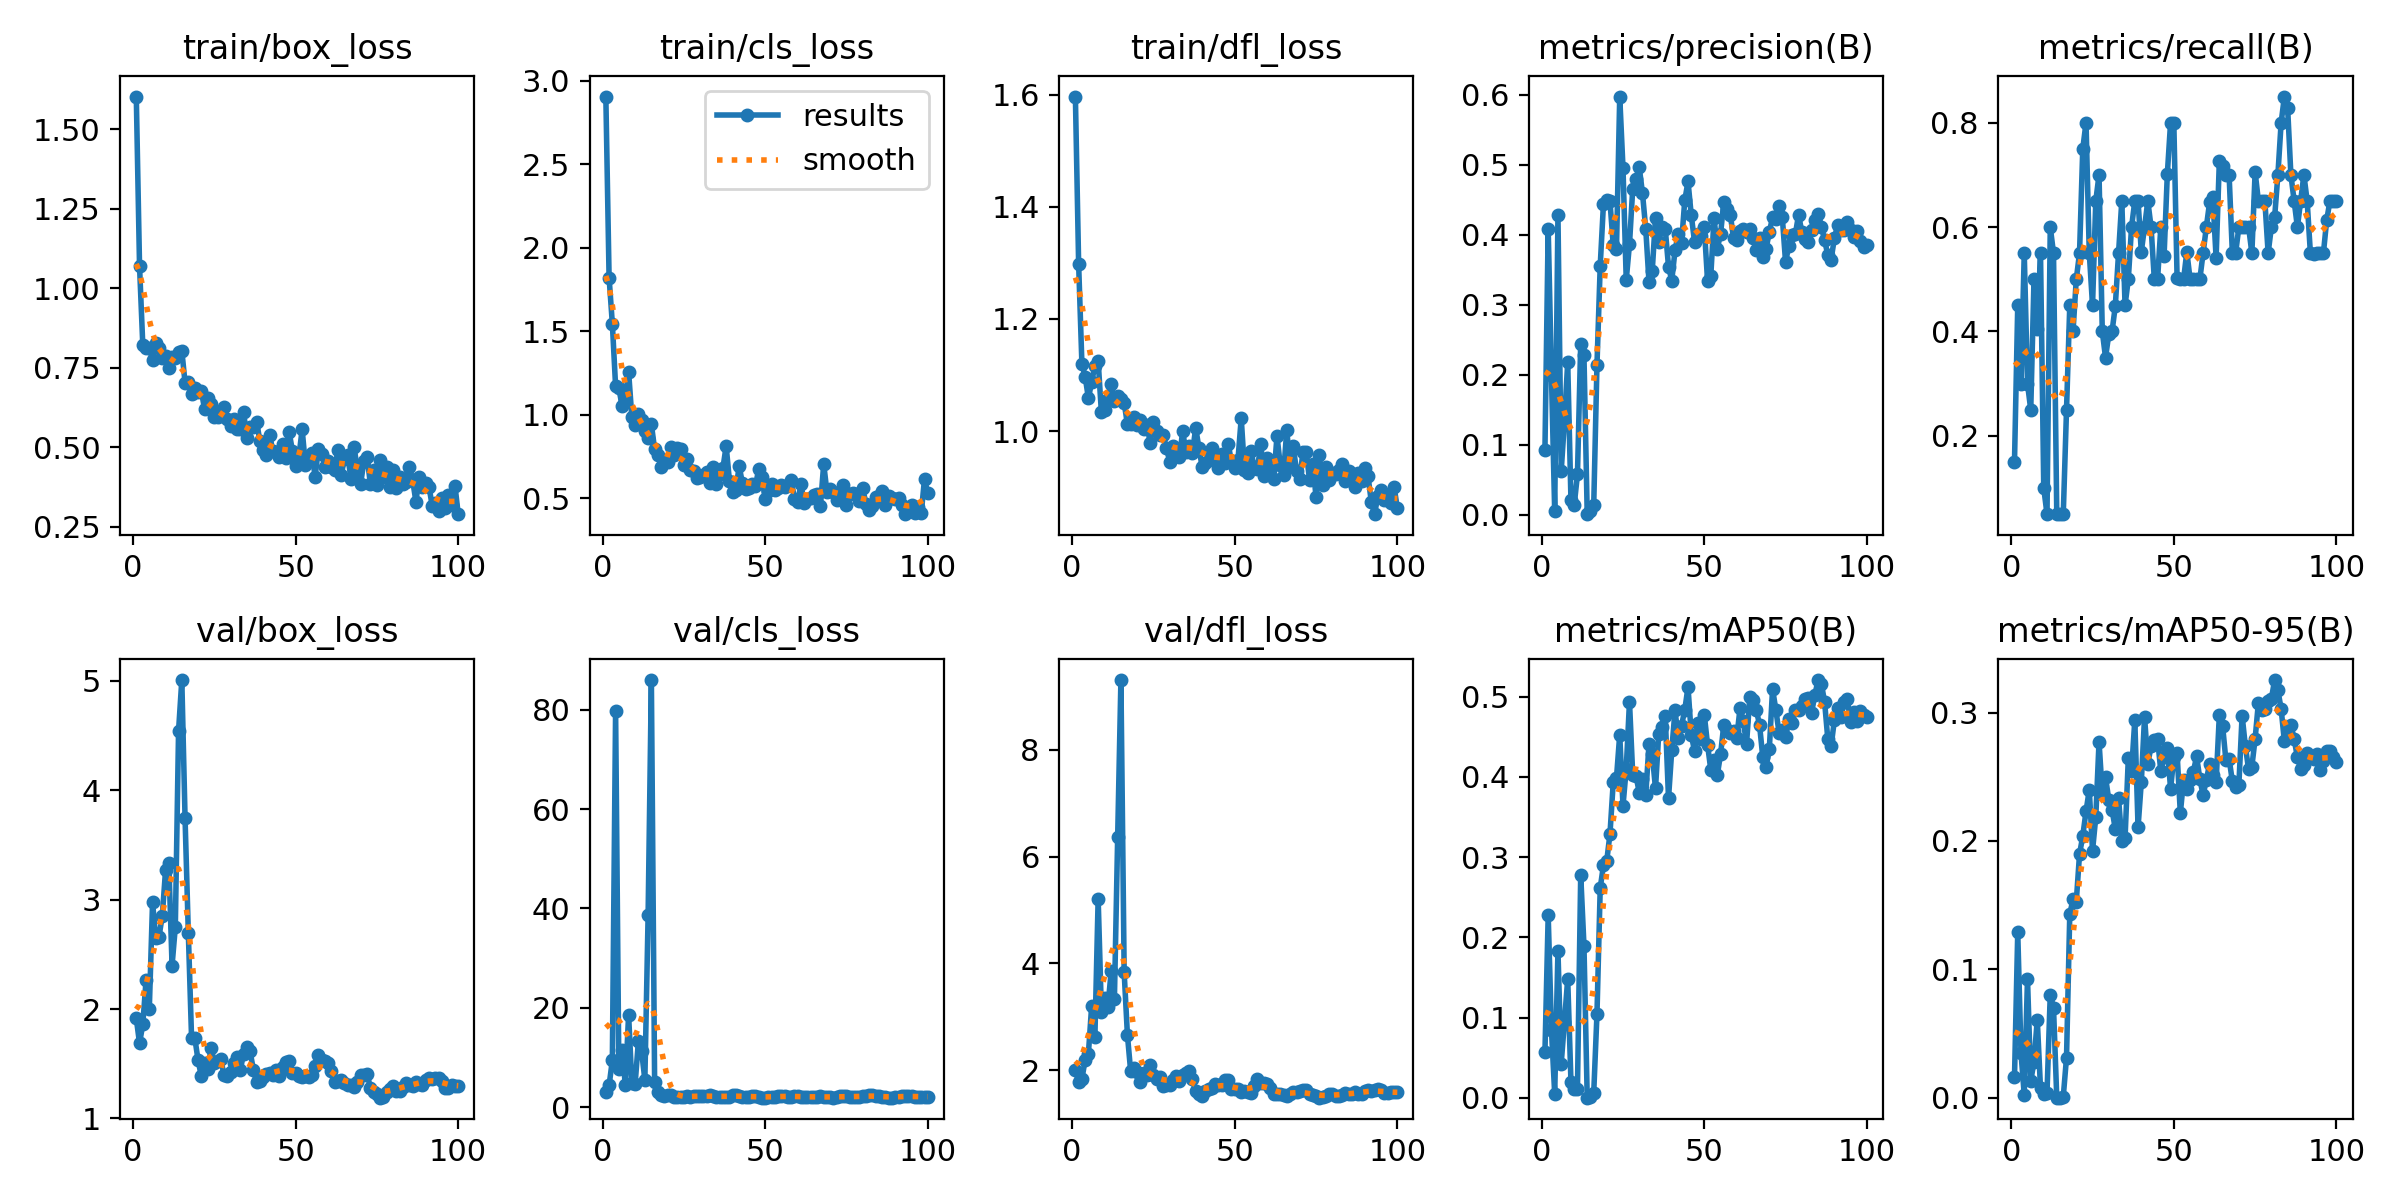

In [14]:
# We can also output some older school graphs if the tensor board isn't working for whatever reason...
Image(filename=f'{str(results.save_dir)}/results.png', width=1000)

## 4.1 Visualize the Training Data

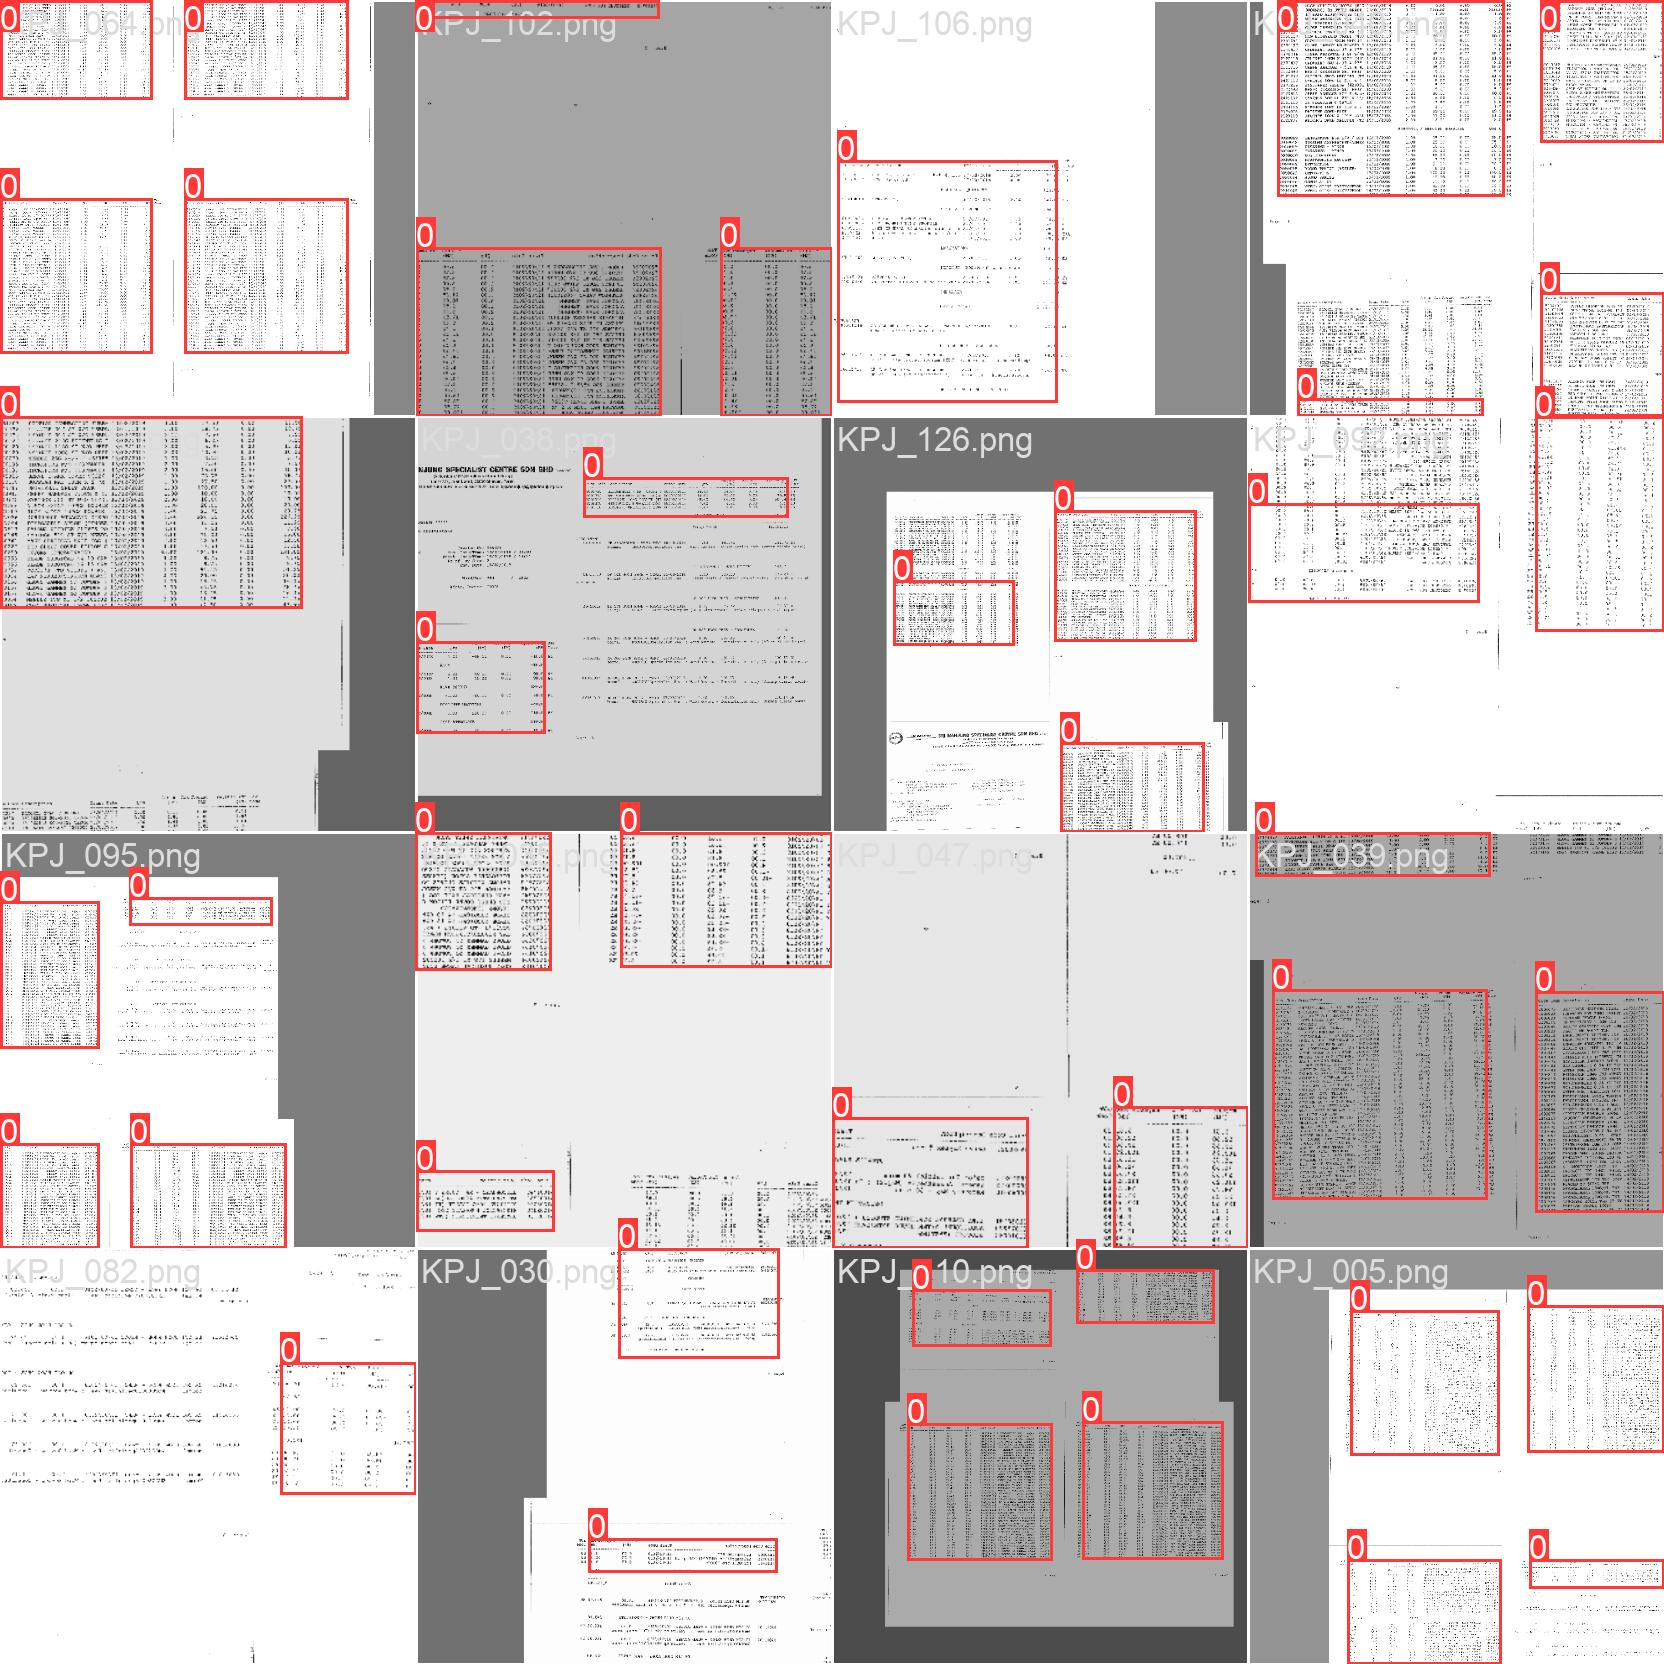

In [15]:
Image(filename=f'{str(results.save_dir)}/train_batch0.jpg', width=900)

## 4.2 Visualize the Labels of Validating Data

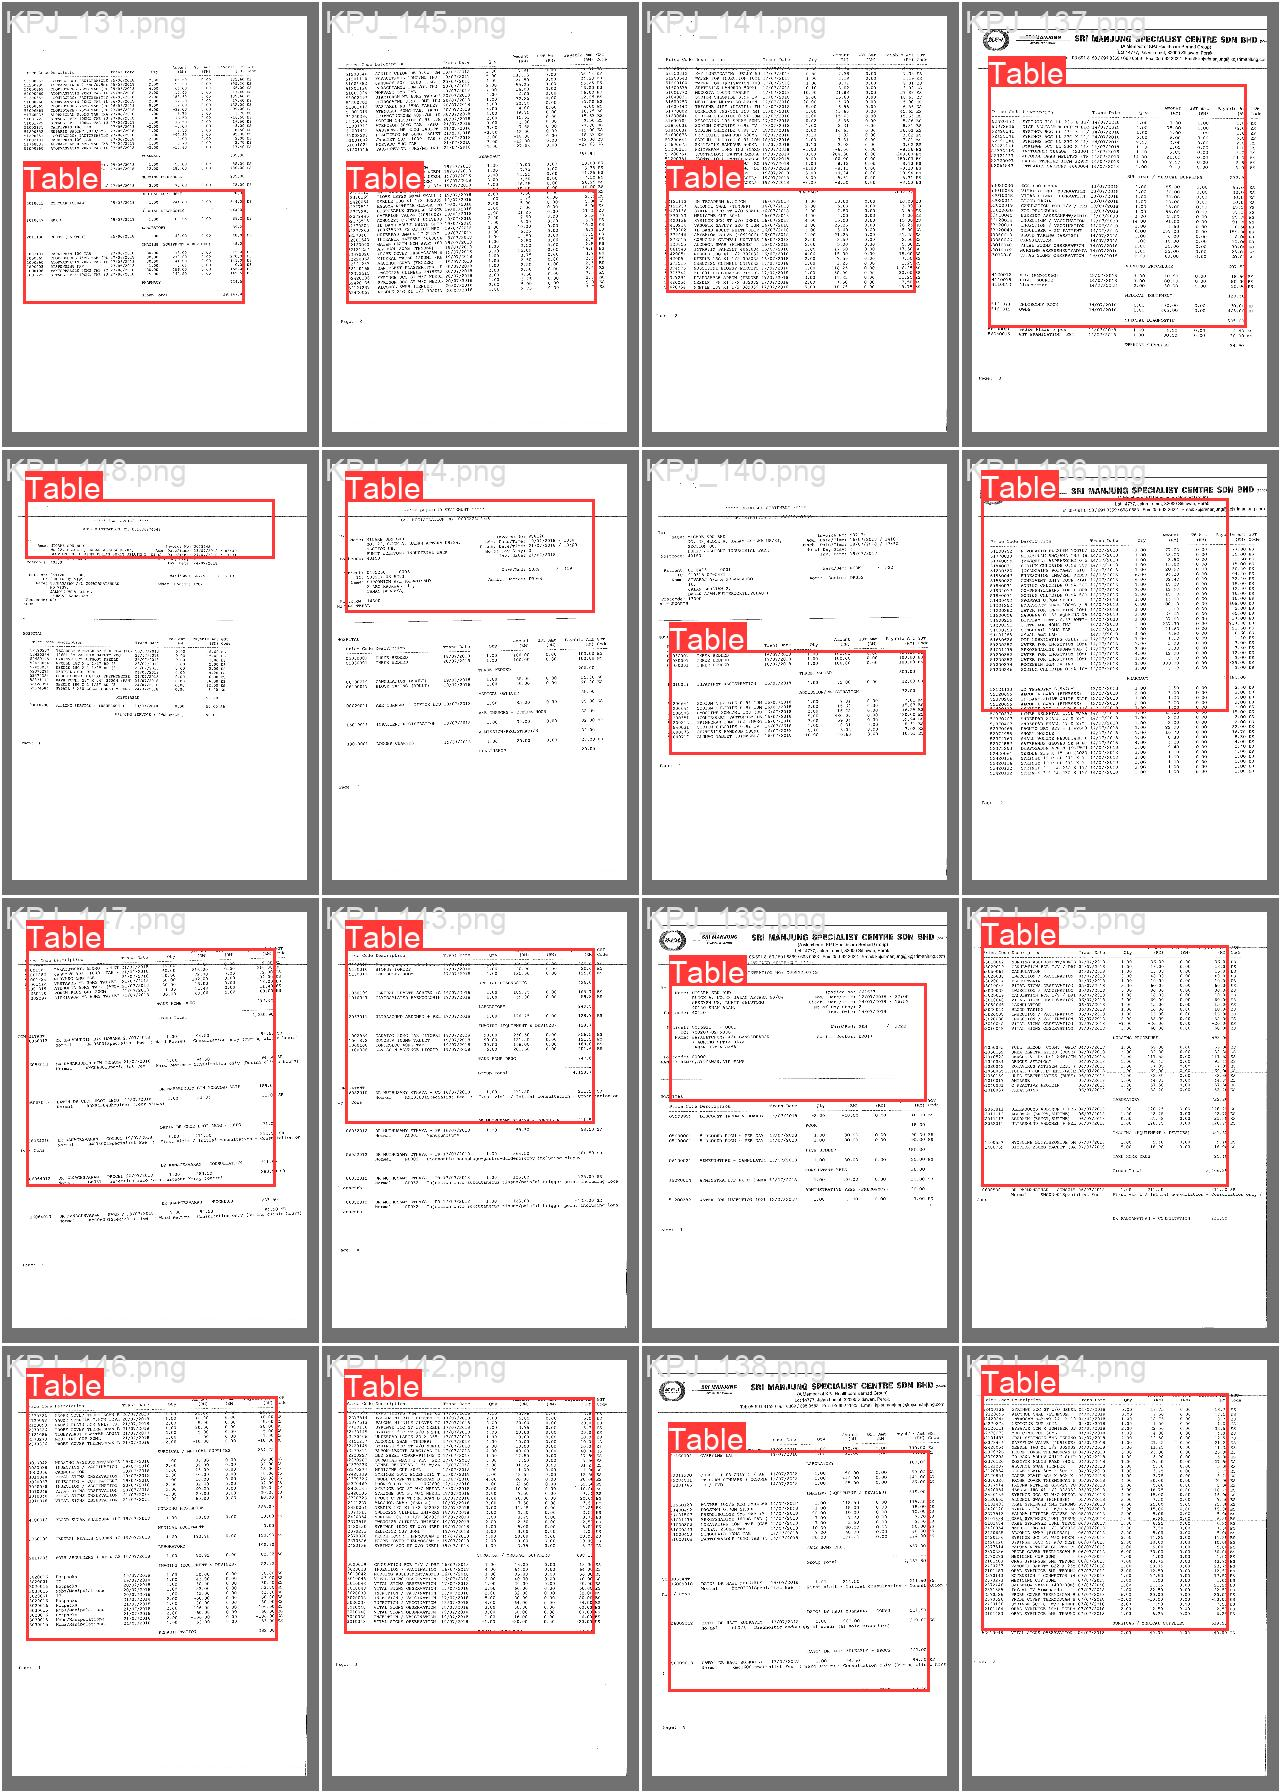

In [16]:
Image(filename=f'{str(results.save_dir)}/val_batch0_labels.jpg', width=900)

## 4.3 Visualize the Predicted Testing Data

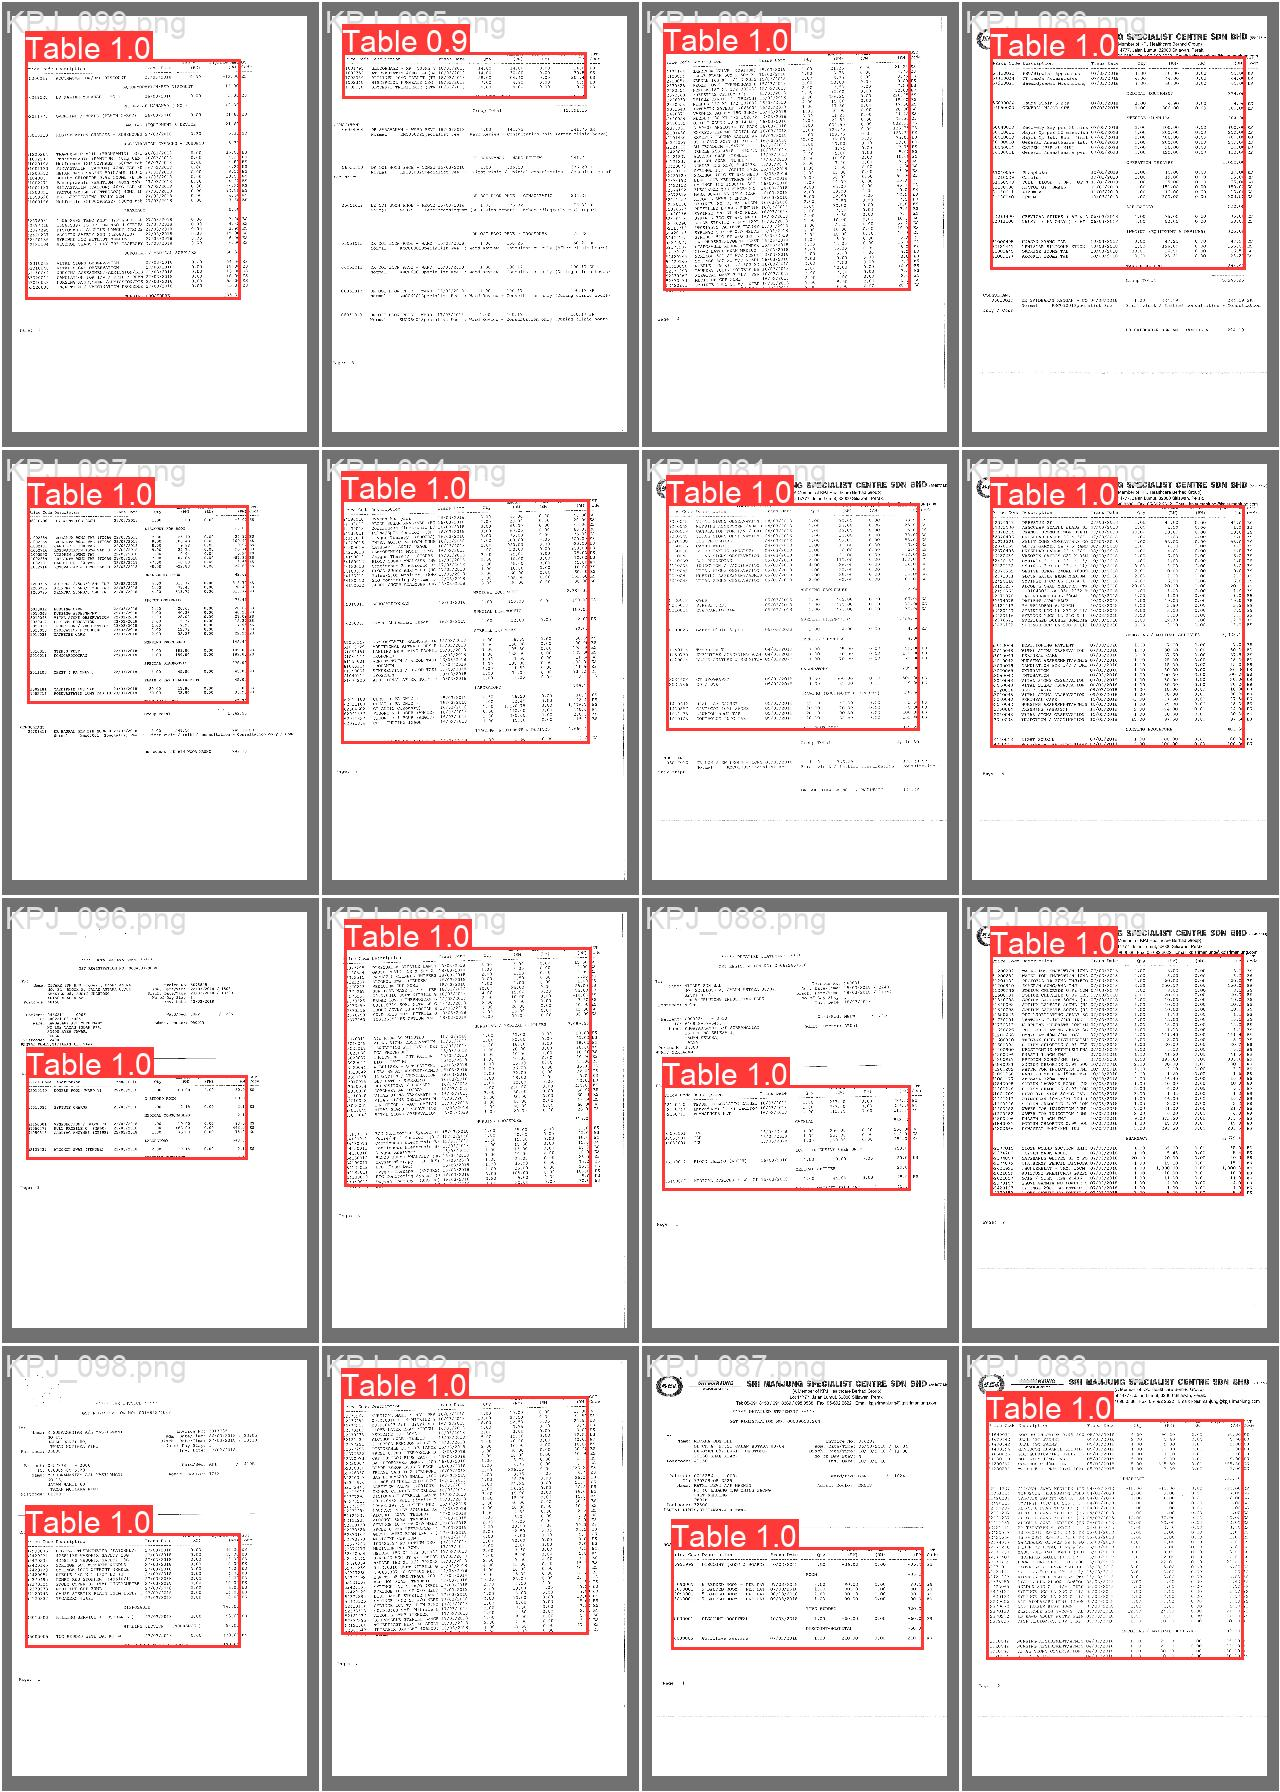

In [11]:
Image(filename=f'{str(results.save_dir)}/val_batch0_pred.jpg', width=900)

# 5 Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.


In [11]:
source = 'data/KPJ_01_test'
model = YOLO(f'{str(results.save_dir)}/weights/best.pt')
# model = YOLO(f'runs/detect/train/weights/best.pt')

# model = YOLO('best.pt')

# deskewer = DataAugmentation.Deskew(source)
# deskewer.processor()

prediction = model.predict(source=source, save=True, imgsz=416)

image 1/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_1.png: 416x320 1 Table, 35.4ms
image 2/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_10.png: 416x320 (no detections), 23.5ms
image 3/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_11.png: 416x320 (no detections), 26.6ms
image 4/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_12.png: 416x320 (no detections), 33.5ms
image 5/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_13.png: 416x320 (no detections), 26.9ms
image 6/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_14.png: 416x320 1 Table, 27.8ms
image 7/31 C:\Users\CP1\Documents\GitHub\Consignment-Itemized-Data\data\KPJ_01_test\ALMCIP07220805_page_15.png: 416x320 (no detections), 35.5ms
image 8/3

In [25]:
print(results.save_dir)

runs\detect\train
